In [28]:
# Decision trees
import sklearn
import numpy as np
import os 
# This make this notebook' output  stable across the runs
np.random.seed(42)
# For Plotting pretty images
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save figures 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "."+ fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.save(path, format=fig_extension,dpi = resolution ) 


In [29]:
# Training and visualizing the DecisionTree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

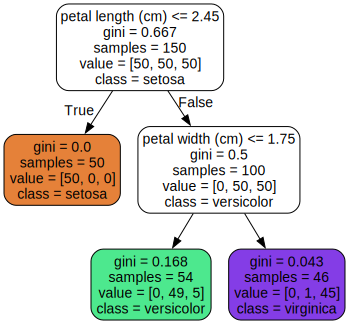

In [30]:
#  The code that generate the figure 
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names =iris.feature_names[2:],
    class_names=iris.target_names,
    rounded = True,
    filled =True
)
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

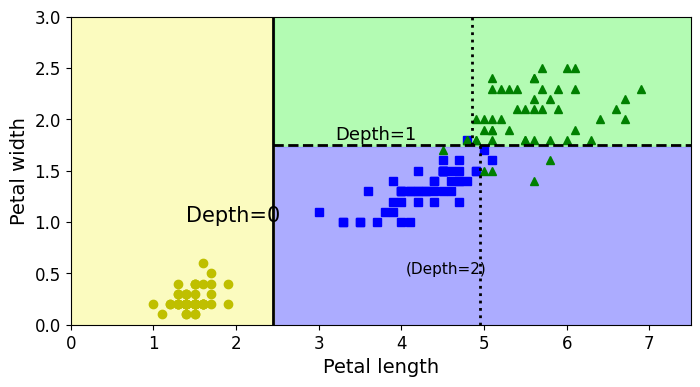

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)  # Fixed typo: 'linspacce' -> 'linspace'
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)  # Fixed typo: 'reshspe' -> 'reshape'

    # Define color maps
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.8)  # Fixed: cmap=custom_cmap2 -> cmap=custom_cmap

    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])  # Fixed: 'custom_c_map2' -> 'custom_cmap2'
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # Plot training data
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")  # Fixed 'y==0' -> 'y==1'
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")  # Fixed 'y==0' -> 'y==2'

    plt.axis(axes)

    # Label axes
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)  # Fixed 'xlablel' -> 'xlabel'
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Generate the plot
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

# Plot decision boundaries with different line styles
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

# Add text labels
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# Save and show the figure
plt.savefig("decision_tree_decision_boundaries_plot.png", dpi=300)  # Fixed: Corrected save_fig function
plt.show()


In [ ]:
# Estimating class Boundaries 
tree_clf.predict_proba([[5, 1.5]])



array([1])

In [ ]:
tree_clf.predict([[5, 1.5]])

In [ ]:
# Regularization Hyperparameters
# We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. Now let's show that training 
# the same model on the same data may produce a very different model every time, since the CART training algorithm 
# used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X,y)


In [ ]:
# code to generate another figure
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25,random_state=53 )

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

deep_tree_clf1.fit(Xm, ym)

deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

